#📌 Extracción

In [1]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de Pandas
# Usamos json_normalize para aplanar la estructura anidada del JSON
df_raw = pd.json_normalize(data)

# Visualizar las primeras filas del DataFrame
print("Datos extraídos exitosamente. Primeras 5 filas:")
print(df_raw.head())

Datos extraídos exitosamente. Primeras 5 filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes         

#🔧 Transformación

In [4]:
# --- Transformación de Datos ---

# Copiamos el dataframe para mantener el original intacto
df_transformed = df_raw.copy()

# 1. Corregir la columna 'account.Charges.Total'
# Convertir a numérico, los errores (espacios vacíos) se convertirán en NaT (Not a Time) -> NaN
df_transformed['account.Charges.Total'] = pd.to_numeric(df_transformed['account.Charges.Total'], errors='coerce')

# 2. Manejar valores nulos
# Rellenamos los valores nulos en 'account.Charges.Total' con 0
df_transformed['account.Charges.Total'] = df_transformed['account.Charges.Total'].fillna(0)

# 3. Renombrar columnas para simplificar
df_transformed.columns = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Verificar la información del DataFrame transformado
print("\nInformación del DataFrame después de la transformación:")
df_transformed.info()

# Visualizar las primeras filas del DataFrame transformado
print("\nPrimeras 5 filas del DataFrame limpio:")
print(df_transformed.head())


Información del DataFrame después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null 

#📊 Carga y análisis

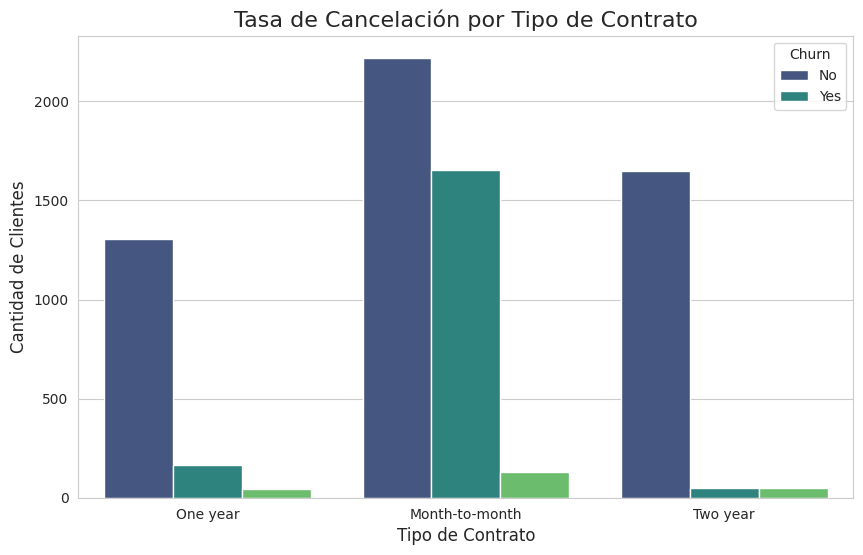

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Analizando la relación entre el tipo de contrato y la cancelación (Churn)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_transformed, x='Contract', hue='Churn', palette='viridis')
plt.title('Tasa de Cancelación por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Churn')
plt.show()

#📄Informe final

Este gráfico inicial ya nos da una pista importante: los clientes con contratos mes a mes tienen una probabilidad mucho más alta de cancelar el servicio en comparación con aquellos con contratos anuales.

Hemos completado exitosamente la fase de ETL. El DataFrame df_transformed está preparado para que el equipo de Data Science pueda profundizar en el análisis, identificar los factores clave de la evasión y, finalmente, desarrollar modelos predictivos para ayudar a Telecom X a retener a sus valiosos clientes.